# Business Case: Netflix - Data Exploration and Visualisation

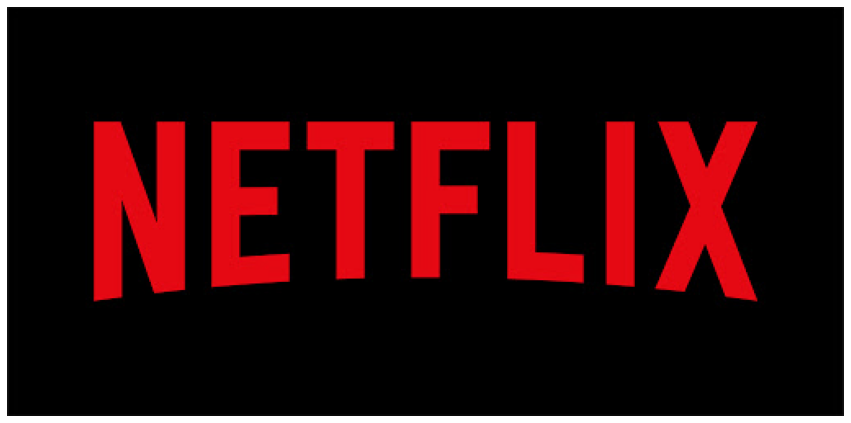

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
from numpy import NAN, NaN, nan
plt.figure(figsize=(15,15))
plt.axis('off')
img = plt.imread('data/Netflix_img.jpg')
plt.imshow(img)
plt.show()

**Business Problem**:To analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce more and to show relevant content to audience and attract more audience and content creators in order to grow the business.

**Dataset**
Link: d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

- **Show_id**: Unique ID for every Movie / Tv Show
- **Type**: Identifier - A Movie or TV Show
- **Title**: Title of the Movie / Tv Show
- **Director**: Director of the Movie
- **Cast**: Actors involved in the movie/show
- **Country**: Country where the movie/show was produced
- **Date_added**: Date it was added on Netflix
- **Release_year**: Actual Release year of the movie/show
- **Rating**: TV Rating of the movie/show
- **Duration**: Total Duration - in minutes or number of seasons
- **Listed_in**: Genre
- **Description**: The summary description

In [2]:
nf = pd.read_csv('data/netflix.csv')
nf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
nf.shape

(8807, 12)

In [5]:
nf.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
nf.describe(include = 'object').T

,count,unique,top,freq
show_id,8807,8807,s8662,1
type,8807,2,Movie,6131
title,8807,8807,The Hater,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [7]:
nf.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
max_rows = 20
pd.set_option("display.max_rows", max_rows)

In [9]:
nf.size

105684

In [10]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
nf.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
nf[nf.duplicated()]  # No repeated rows.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [13]:
nf['type'].value_counts(normalize = True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

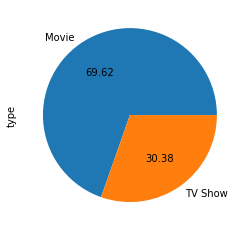

In [14]:
nf['type'].value_counts().plot(kind = 'pie',autopct='%.2f')
plt.show()

In [15]:
# Showing the null values with heatmap

In [16]:
nf.isnull().sum()/len(nf) *100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [17]:
nf.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

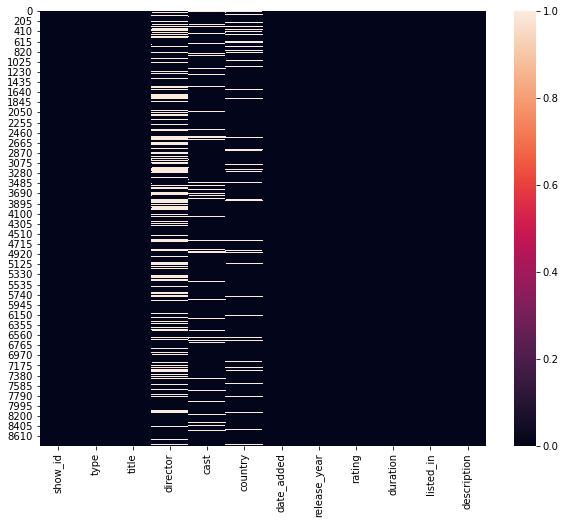

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(nf.isnull())
plt.show()


**Conclusion** : From above heat map, we can conclude that only director, cast and country has significant amount of null values in which director's null values are highest.

# Ratings specific EDA

In [19]:
rat=nf['rating'].nunique(dropna=False)
rat

18

In [20]:
nf['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [21]:
nf['rating'].value_counts() >6

TV-MA        True
TV-14        True
TV-PG        True
R            True
PG-13        True
TV-Y7        True
TV-Y         True
PG           True
TV-G         True
NR           True
G            True
TV-Y7-FV    False
NC-17       False
UR          False
66 min      False
74 min      False
84 min      False
Name: rating, dtype: bool

In [22]:
nf.shape

(8807, 12)

In [23]:
nf['release_year'].value_counts().head(10)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

In [24]:
nf_rating_copy = nf
nf_rat = nf.groupby('rating')[['release_year']].count()
nf_rat = nf_rat.drop(['74 min','84 min','66 min','UR','TV-Y7-FV','NC-17'])
nf_rat.reset_index(inplace = True)
nf_rat.columns = ['rating','release_year counts']
nf_rat


,rating,release_year counts
0,G,41
1,NR,80
2,PG,287
3,PG-13,490
4,R,799
5,TV-14,2160
6,TV-G,220
7,TV-MA,3207
8,TV-PG,863
9,TV-Y,307


In [25]:
nf_rating=nf_rating_copy.merge(nf_rat,  how='inner')
nf_rating.head()
nf_rating.shape

(8788, 13)

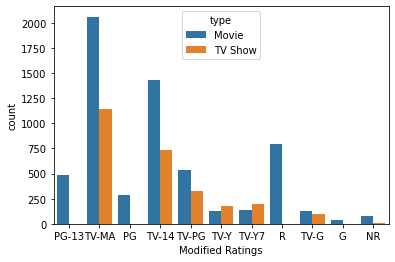

In [26]:
# plt.figure(figsize=(10,7))
sns.countplot(data = nf_rating, x = 'rating', hue = 'type')
plt.xlabel('Modified Ratings')
plt.show()

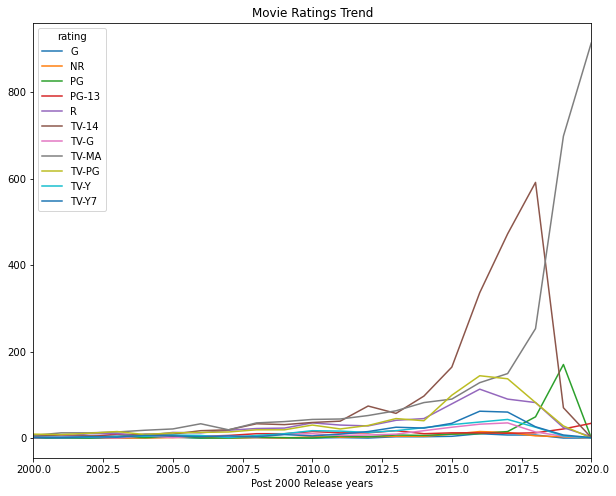

In [27]:
pd.crosstab(nf['release_year'] ,nf_rating['rating'] ).plot(kind= 'line',figsize = (10,8),title = 'Movie Ratings Trend')
plt.xlim(2000,2020)
plt.xlabel('Post 2000 Release years')
plt.show()

**Conclusion**: 
- I have removed the outliers i.e the values ('74 min','84 min','66 min','UR','TV-Y7-FV','NC-17') those were not contributing enough to the plot. Also, as the values/counts were almost non changing for years less than 2000, I have visualized after 2000.
- From above line plot, as we can clear see that TV-14(unsuitable for childer under 14) has been decreasing lately due to advancements in internet technology and TV-MA(content for mature adults) has been more preferred now a days owing to lockdown restriction and self-isolations due to COVID. 
- Hence Netflix should focus more on content related to TV-MA ratings

In [28]:
# New column for datetime created

# Date-added specidic EDA

In [29]:
nf['date_time_added'] = pd.to_datetime(nf['date_added'])
nf.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24


In [30]:
nf['date_time_added'].dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_time_added, dtype: int64

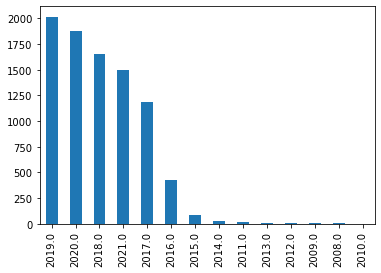

In [31]:
nf['date_time_added'].dt.year.value_counts().plot(kind = 'bar')
plt.show()

In [321]:
# dt_add_year = pd.Series(nf['date_time_added'] .dropna()).apply(lambda x: int(x.strftime("%Y"))) -- For year

In [32]:
nf['month']=nf['date_time_added'].dt.month.fillna(-1)

In [33]:
nf['month']=nf['month'].astype('int64')

In [34]:
nf.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9


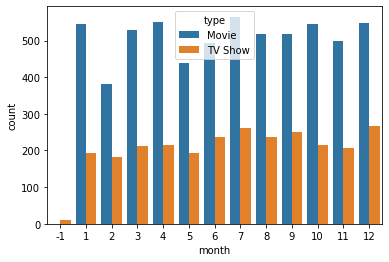

In [35]:
sns.countplot(x='month',hue='type',  data=nf)
plt.show()

**Conclusion** : 
- From above bar plot, we can conclude the order of release of the movies/tv shows, where maximumn no. of movies/tv shows are added in year 2019. 
- Also, we can clear conclude from above count plot that more number of movies are produced as compared to tv shows and in the month of February, less number of movies are being added. Netflix should focus on this aspect as well as why this is hapening and should rule out any possibility of mismanagement

# Released year specific EDA 

In [36]:
nf['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

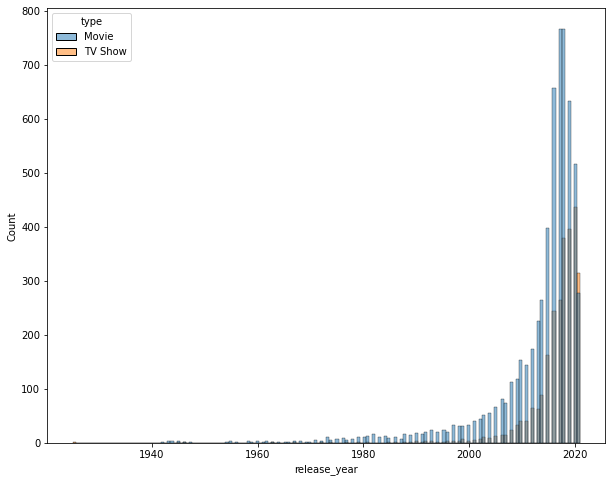

In [37]:
plt.figure(figsize=(10,8))
sns.histplot(data = nf, x = 'release_year',hue = 'type')
plt.show()

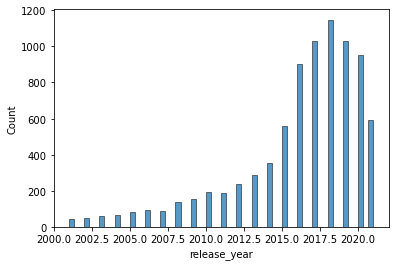

In [38]:
# plt.figure(figsize=(7,7))
nf_rel_yr_2000 = nf.loc[nf['release_year'] > 2000 , ['release_year','type']]
sns.histplot(data = nf_rel_yr_2000, x = 'release_year', bins = 60)
plt.show()


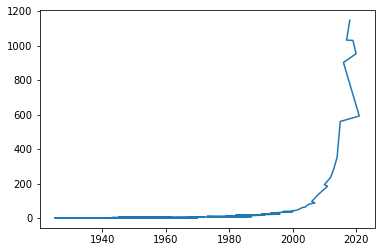

In [39]:
nf['release_year'].value_counts().plot(kind = 'line')
plt.show()

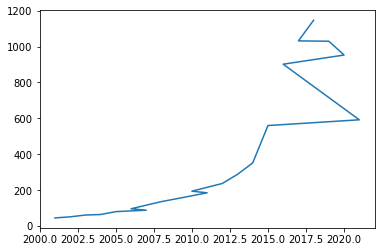

In [40]:
# plt.figure(figsize=(15,10))
nf.loc[nf['release_year'] > 2000 , 'release_year'].value_counts().plot(kind = 'line')
plt.show()

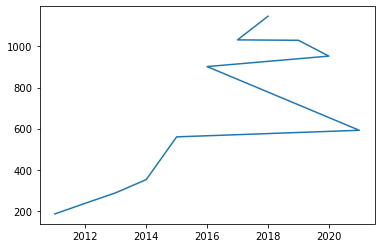

In [41]:
nf.loc[nf['release_year'] > 2010 , 'release_year'].value_counts().plot(kind = 'line')
plt.show()

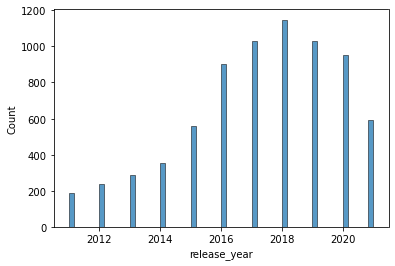

In [42]:
nf_rel_yr_2010 = nf.loc[nf['release_year'] > 2010 , ['release_year','type']]
sns.histplot(data = nf_rel_yr_2010, x = 'release_year', bins = 60)
plt.show()

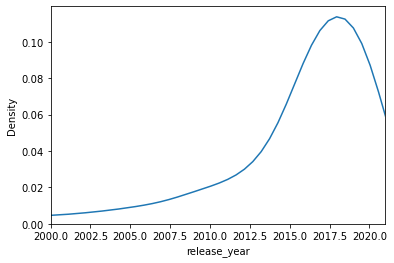

In [43]:
sns.kdeplot(nf['release_year'])
plt.xlim(2000,2021)
plt.show()

**Conclusion** : From above barplot, histplot,kdeplot and lineplot for univariate data, we can conclude that, the movies which have relased dates starts right from 1925(nf.describe().min()) and has an increasing trend till 2018 (which had maximum no. of movies/tv shows released) after which the movies/tv shows saw a drop till 2021.

# Movies and TV shows specific EDA

In [44]:
nf.groupby('type').type.count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

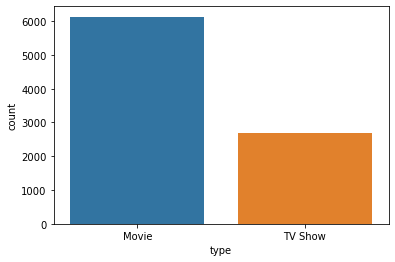

In [45]:
sns.countplot(x = 'type', data =nf)
plt.show()

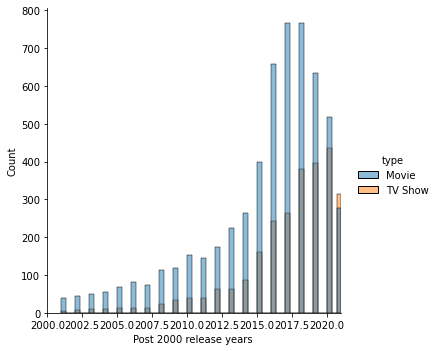

In [46]:

sns.displot(data = nf_rel_yr_2000, x = 'release_year', bins = 60, hue = 'type')
plt.xlabel('Post 2000 release years ')
plt.xlim(2000,2021)
plt.show()

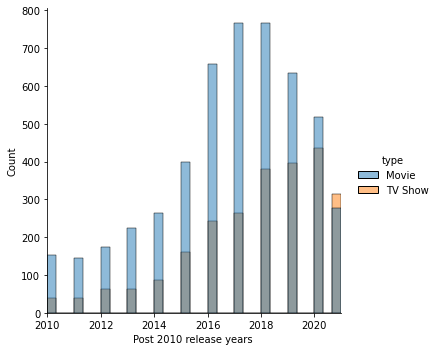

In [47]:
# plt.figure(figsize=(25,25))
sns.displot(data = nf_rel_yr_2000, x = 'release_year', bins = 60, hue = 'type')
plt.xlabel('Post 2010 release years ')
plt.xlim(2010,2021)
plt.show()

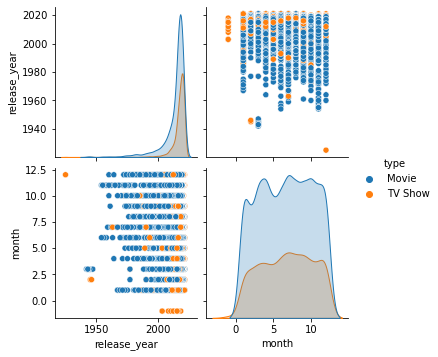

In [48]:
sns.pairplot(data= nf, hue = 'type')
plt.show()

**Conclusion** : From above pairplot, countplot and distplot we can conclude that there are more number of movies produced as compared to tv shows except in year 2021 where tv shows outnumbered the no. of movies.

# Country specific EDA

In [119]:
nf['country'].value_counts(dropna = False)

United States                             2818
India                                      972
NaN                                        831
United Kingdom                             419
Japan                                      245
                                          ... 
France, United States, Mexico                1
Spain, Germany, Denmark, United States       1
United Kingdom, South Korea                  1
Pakistan, United Arab Emirates               1
France, United States, Canada                1
Name: country, Length: 749, dtype: int64

In [152]:
type(nf['country'].dropna())

pandas.core.series.Series

In [170]:
type(nf['country'][2])

str

In [169]:
type(nf['country'][1])

str

In [168]:
nf['country'].replace(to_replace=[NaN], value=['NaN'], inplace=True)
nf['country']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [172]:
country_2dlist = nf['country'].str.split(',').to_list()
# country_2dlist

In [178]:
nf_country_copy = nf

In [174]:
country_list_fin = []
for i in range(len(country_2dlist)):
    country_list = []
    for j in range(len(country_2dlist[i])):
        country_list.append(country_2dlist[i][j].strip().lower())
    country_list_fin.append(country_list)
# country_list_fin

In [179]:
nf_country_df=pd.DataFrame(country_list_fin,index=nf['title']) # as titles are unique for eachrow, keeping it as index as our primary key
# nf_country_df
nf_country_df1=nf_country_df.stack()
# nf_country_df1
nf_country_df2=pd.DataFrame(nf_country_df1)
nf_country_df2
nf_country_df2.reset_index(inplace = True)
nf_country_df2
nf_country_df2 = nf_country_df2[['title',0]]
nf_country_df2
nf_country_df2.columns = ['title','country_modified']
nf_country_df2
nf_country_copy = nf_country_copy.merge(nf_country_df2, on='title',  how='inner')
nf_country_copy.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month,country_modified
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,united states
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,south africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9,nan


In [180]:
nf_country_copy.shape

(10850, 15)

In [121]:
df = nf['country'].str.split(',',expand=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [122]:
df = nf['country'].str.split(',',expand=True)
df.nunique()

0     86
1     93
2     60
3     49
4     23
5     15
6      6
7      4
8      2
9      2
10     1
11     1
dtype: int64

In [123]:
# country_list = []
country_set_fin = set()
for i in range(12):
    list1 = df.loc[:,i].dropna().to_list()
    list2 = []
    for i in list1:
        list2.append(i.strip())
    country_set = set(list2)
    for i in country_set:
        country_set_fin.add(i)        
country_list = list(country_set_fin)
country_list_fin = country_list[1:]
print(country_list_fin,end = ' ')        

['Iceland', 'Iraq', 'Spain', 'Serbia', 'Nicaragua', 'Germany', 'Sweden', 'Vatican City', 'Taiwan', 'Switzerland', 'Latvia', 'Qatar', 'Poland', 'Romania', 'Paraguay', 'Cyprus', 'West Germany', 'Lithuania', 'Norway', 'Panama', 'Slovenia', 'Argentina', 'Israel', 'Hong Kong', 'Saudi Arabia', 'United Arab Emirates', 'Japan', 'India', 'Sri Lanka', 'Cameroon', 'Uruguay', 'Sudan', 'East Germany', 'Portugal', 'Kazakhstan', 'Bermuda', 'Malaysia', 'Senegal', 'Burkina Faso', 'Cambodia', 'Canada', 'South Korea', 'Cayman Islands', 'United Kingdom', 'Bangladesh', 'Angola', 'Cuba', 'Turkey', 'Egypt', 'Singapore', 'Iran', 'Luxembourg', 'Netherlands', 'Kenya', 'Puerto Rico', 'Slovakia', 'Bahamas', 'Kuwait', 'Finland', 'Colombia', 'Namibia', 'Dominican Republic', 'New Zealand', 'Guatemala', 'Belarus', 'Italy', 'Ukraine', 'Azerbaijan', 'Ecuador', 'Peru', 'Uganda', 'Soviet Union', 'Syria', 'United States', 'Algeria', 'Albania', 'Palestine', 'Vietnam', 'Zimbabwe', 'Thailand', 'Indonesia', 'Ghana', 'Georgia'

In [124]:
len(country_list_fin)

122

In [125]:
country_list = []

for i in range(12):
    list1 = df.loc[:,i].dropna().to_list()
    list2 = []
    for i in list1:
        list2.append(i.strip())
    for i in list2:
        country_list.append(i)


In [126]:
country_list_filter = filter(None, country_list) # Handling / Filtering of  None/Empty values from the list which frequency was 7
country_list_filter

In [127]:
max_rows = 130
pd.set_option("display.max_rows", max_rows)

In [128]:
country_list_series = pd.Series(country_list_filter).value_counts()

In [129]:
top_10 = country_list_series.head(10)
top_10

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
dtype: int64

In [130]:
bottom_38 = country_list_series.tail(38)

In [132]:
top_10[0]

3690

In [137]:
top_10_df = pd.DataFrame({'Netflix Reach':top_10})
top_10_df

,Netflix Reach
United States,3690
India,1046
United Kingdom,806
Canada,445
France,393
Japan,318
Spain,232
South Korea,231
Germany,226
Mexico,169


In [138]:
top10_dfnewest = top_10_df.reset_index()
top10_dfnewest

,index,Netflix Reach
0,United States,3690
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


In [139]:
top10_dflatest = top10_dfnewest.rename(columns = {'index':'Top 10 Countries'})
top10_dflatest

,Top 10 Countries,Netflix Reach
0,United States,3690
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


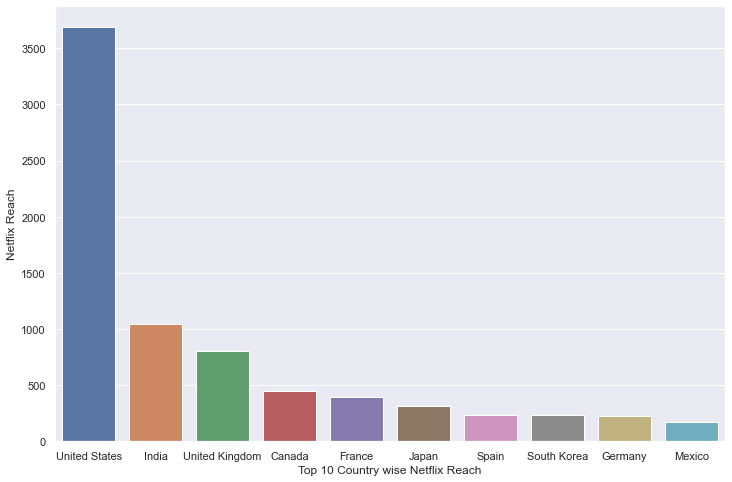

In [146]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.barplot(data = top10_dflatest,x = 'Top 10 Countries', y ='Netflix Reach')
plt.xlabel('Top 10 Country wise Netflix Reach')
plt.show()

In [71]:
# nf['type'].value_counts().plot(kind = 'pie',autopct='%.2f')
# plt.show()

**Conclusion 1** : For the EDA on country sepcidic data, as we can see that more than one countries are given in the country column, I have converted them into a single list of unique countries, from which we can conclude than there ate 122 unique countries in the dataset 

**Conclusion 2** :
- Previously 831 countries had NaN as the entry field for country. Which is 3rd largest after US and India. I removed them and after converting the messy country data into a series of unique countries with Netflix's movie's or tv shows being watched. 
- **country_list_series.head(10)** contains the value counts of top 10 countries having reach of Netflix.
-**country_list_series.tail(38)** contains 38 countries where Netflix has only 1 reach. Netflix should focus on relevant content for these downtrodden countries so that it's reach will increase
- With the help of barplot, we can see that US is having most no. of Neflix reach in terms of movies/tvshow shown on platform which can be given by **top10_dflatest** dataframe
- **nf_country_copy** is the updated copy of our original dataframe(nf) w.r.t unique countries

# Movies/ TV show types (listed_in) specific EDA

In [181]:
df_show_types = nf['listed_in'].str.split(',',expand=True)
df_show_types

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [182]:
show_types = []

for i in range(3):
    list1 = df_show_types.loc[:,i].dropna().to_list()
    list2 = []
    for i in list1:
        list2.append(i.strip().lower())
    for i in list2:
        show_types.append(i)

# show_types        

In [183]:
# show_types_Series_new = pd.Series(show_types)
# show_types_Series_new

In [185]:
show_types_Series = pd.Series(show_types).value_counts()
show_types_top10 = show_types_Series.head(10)
show_types_top10
# show_types_Series

international movies        2752
dramas                      2427
comedies                    1674
international tv shows      1351
documentaries                869
action & adventure           859
tv dramas                    763
independent movies           756
children & family movies     641
romantic movies              616
dtype: int64

In [191]:
show_types_top10.index

Index(['international movies', 'dramas', 'comedies', 'international tv shows',
       'documentaries', 'action & adventure', 'tv dramas',
       'independent movies', 'children & family movies', 'romantic movies'],
      dtype='object')

In [192]:
nf_listed_in_copy = nf
df_show_types_2dlist = nf['listed_in'].str.split(',').to_list()
# df_show_types_2dlist

In [193]:
show_types_list_fin = []
for i in range(len(df_show_types_2dlist)):
    show_types_list = []
    for j in range(len(df_show_types_2dlist[i])):
        show_types_list.append(df_show_types_2dlist[i][j].strip().lower())
    show_types_list_fin.append(show_types_list)
# show_types_list_fin

In [194]:
nf_show_types_df=pd.DataFrame(show_types_list_fin,index=nf['title']) # as titles are unique for eachrow, keeping it as index as our primary key
# nf_show_types_df
nf_show_types_df1=nf_show_types_df.stack()
# nf_show_types_df1
nf_show_types_df2=pd.DataFrame(nf_show_types_df1)
# nf_show_types_df2
nf_show_types_df2.reset_index(inplace = True)
nf_show_types_df2
nf_show_types_df2 = nf_show_types_df2[['title',0]]
# nf_show_types_df2
nf_show_types_df2.columns = ['title','listed_in_modified']
# nf_show_types_df2
nf_listed_in_copy = nf_listed_in_copy.merge(nf_show_types_df2, on='title',  how='inner')
nf_listed_in_copy.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month,listed_in_modified
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,international tv shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,tv dramas


In [195]:
nf_listed_in_copy.shape

(19323, 15)

In [196]:
nf_listed_in_copy['listed_in_modified'].nunique()

42

In [197]:
show_types_top10[0]

2752

In [198]:
show_types_top10.index

Index(['international movies', 'dramas', 'comedies', 'international tv shows',
       'documentaries', 'action & adventure', 'tv dramas',
       'independent movies', 'children & family movies', 'romantic movies'],
      dtype='object')

In [202]:
show_types_top10_dfnew = pd.DataFrame({'Frequency':show_types_top10})
top10_dfnewest = show_types_top10_dfnew.reset_index()
top10_dflatest = top10_dfnewest.rename(columns = {'index':'Genre'})
top10_dflatest

,Genre,Frequency
0,international movies,2752
1,dramas,2427
2,comedies,1674
3,international tv shows,1351
4,documentaries,869
5,action & adventure,859
6,tv dramas,763
7,independent movies,756
8,children & family movies,641
9,romantic movies,616


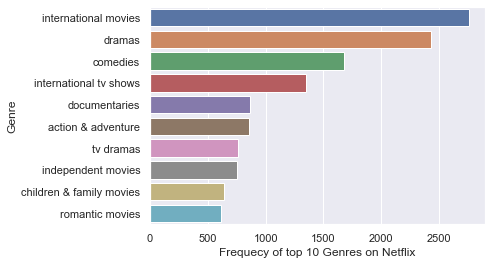

In [207]:
# plt.figure(figsize=(12,10))
sns.set_theme(style="darkgrid")
sns.barplot(data = top10_dflatest, y = 'Genre', x='Frequency')
plt.xlabel('Frequecy of top 10 Genres on Netflix')
plt.show()

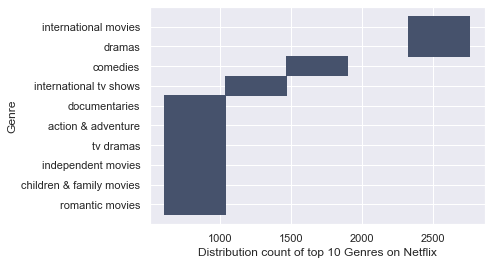

In [209]:
sns.set_theme(style="darkgrid")
sns.histplot(top10_dflatest,y = 'Genre', x='Frequency')
plt.xlabel('Distribution count of top 10 Genres on Netflix')
plt.show()

**Conclusion**:
- **nf_listed_in_copy** is the updated copy of our original (nf)dataframe w.r.t unique 42 genres of tv shows/movies
- In the above barplot, we can see the data for top 10 genres(listed_in) and it's frequency. It's eveident that, international movies and dramas are having the major share follwed by comedies and International tv shows. Rest of the genres are having less shows on Netflix with frequency less than 1000 which can be seen with histplot
- Hence Netflix should focus more on these documentaries -869, action & adventure-859,tv dramas-763,independent movies-756,
children & family movies 641,romantic movies-616

# TV Shows specific EDA

In [275]:
tv = nf.loc[nf.type == 'TV Show']
tv.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,9


In [276]:
tv.shape

(2676, 14)

**Shows greater than 1 season - 883/2676**

In [277]:
hit_tv1 = tv.loc[tv['duration'].apply(lambda x: int(x.split(" ")[0]))>1]
hit_tv1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,9


In [278]:
hit_tv1.shape

(883, 14)

In [279]:
hit_tv1.title.head(10)

1                     Blood & Water
4                      Kota Factory
8     The Great British Baking Show
15                Dear White People
17                  Falsa identidad
21           Resurrection: Ertugrul
25             Love on the Spectrum
32                    Sex Education
39                     Chhota Bheem
49                Castle and Castle
Name: title, dtype: object

**Conclusion** :Out of 2676 TV shows, 883 shows have duration more than 1 Season which means, the first season was a hit and liked by audience hence it's beneficial to go for next season.

**Shows More than 5 seasons - 100/2676**


In [280]:
hit_tv2 = tv.loc[tv['duration'].apply(lambda x: int(x.split(" ")[0]))>5]
hit_tv2.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,9
55,s56,TV Show,Nailed It,NaN,"Nicole Byer, Jacques Torres",United States,"September 15, 2021",2021,TV-PG,6 Seasons,Reality TV,Home bakers with a terrible track record take ...,2021-09-15,9


**Total 100 similar tv shows can be recommended for more focus w.r.t production**

In [281]:
hit_tv2.shape

(99, 14)

In [282]:
hit_tv2 = hit_tv2.sort_values(by = 'release_year',ascending=False,ignore_index=True)
hit_tv3 = hit_tv2.loc[:,['title','release_year','duration','country']]
hit_tv3
# hit_tv2[['title','release_year','duration','country']]

,title,release_year,duration,country
0,The Great British Baking Show,2021,9 Seasons,United Kingdom
1,Numberblocks,2021,6 Seasons,United Kingdom
2,Nailed It,2021,6 Seasons,United States
3,Lucifer,2021,6 Seasons,United States
4,Grace and Frankie,2021,7 Seasons,United States
...,...,...,...,...
94,Cheers,1992,11 Seasons,United States
95,Danger Mouse: Classic Collection,1992,10 Seasons,United Kingdom
96,Saint Seiya,1986,6 Seasons,Japan
97,Dad's Army,1977,10 Seasons,United Kingdom


**Sorting w.r.t year and most seasons**

In [283]:
# hit_tv3[['Num','Seasons']] = hit_tv3['duration'].apply(lambda x: int(x.split(" ")))
# hit_tv3

In [284]:
hit_tv3[['Num','Seasons']] = hit_tv3['duration'].str.split(" ",expand = True)
hit_tv3['Num'] = hit_tv3['Num'].astype(int)
hit_tv3

,title,release_year,duration,country,Num,Seasons
0,The Great British Baking Show,2021,9 Seasons,United Kingdom,9,Seasons
1,Numberblocks,2021,6 Seasons,United Kingdom,6,Seasons
2,Nailed It,2021,6 Seasons,United States,6,Seasons
3,Lucifer,2021,6 Seasons,United States,6,Seasons
4,Grace and Frankie,2021,7 Seasons,United States,7,Seasons
...,...,...,...,...,...,...
94,Cheers,1992,11 Seasons,United States,11,Seasons
95,Danger Mouse: Classic Collection,1992,10 Seasons,United Kingdom,10,Seasons
96,Saint Seiya,1986,6 Seasons,Japan,6,Seasons
97,Dad's Army,1977,10 Seasons,United Kingdom,10,Seasons


In [285]:
hit_tv4 = hit_tv3.sort_values(by = 'Num',ascending=False,ignore_index=True)
hit_tv4.head(5)


,title,release_year,duration,country,Num,Seasons
0,Grey's Anatomy,2020,17 Seasons,United States,17,Seasons
1,NCIS,2017,15 Seasons,United States,15,Seasons
2,Supernatural,2019,15 Seasons,"United States, Canada",15,Seasons
3,COMEDIANS of the world,2019,13 Seasons,United States,13,Seasons
4,Red vs. Blue,2015,13 Seasons,United States,13,Seasons


In [286]:
hit_tv4.tail(5)

,title,release_year,duration,country,Num,Seasons
94,Terrace House: Opening New Doors,2018,6 Seasons,Japan,6,Seasons
95,Gossip Girl,2012,6 Seasons,United States,6,Seasons
96,BoJack Horseman,2020,6 Seasons,United States,6,Seasons
97,Private Practice,2012,6 Seasons,United States,6,Seasons
98,Longmire,2017,6 Seasons,United States,6,Seasons


In [288]:
top_100_title_array = hit_tv2['title'].to_list()
# top_100_title_array 

# Movies specific EDA

In [259]:
mov = nf.loc[nf.type == 'Movie']
mov.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,9


In [261]:
mov.shape

(6131, 14)

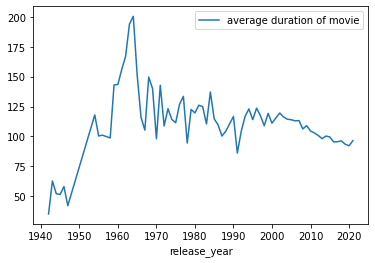

In [258]:
mov_dur = mov.loc[:,['duration','release_year']]
mov_dur = mov_dur.dropna()
mov_dur[['average duration of movie']] = mov_dur['duration'].str.split(" ",expand = True)[0]
mov_dur['average duration of movie'] = mov_dur['average duration of movie'].astype(int)
mov_dur.groupby('release_year').mean().plot(kind = 'line')
plt.show()

**Conclusions**:
- As the rating includes the age bars and not the ratings of a particular movie or tv show, we can't conclude on what should be the audience most watched and liked shows/movies with such data  hence moving on to more evident column i.e duration
- As we can see form above line plot that the average duration of movie over the years in last 2 decades has been in the range of 90 - 125 mins, so Netflix should focus on movies with short duration on this range
- Also, it's eveident that, the average duration has been decresing due to lower attention span of audience owing to increasing use of quick and fast content consumption from the social media, hence Netflix should bring in **short movies** or **short films** for better audience reach
- For TV shows, I have analysed the data w.r.t duration of the tv shows in seasons. The tv show with maximum duartion will be the show which is liked by audience in general and hence have sorted the TV shows as per shows greater than 1 season and 5 seasons respectively in which the ones > 5 seasons contains top 100 shows in array **top_100_title_array**.

# Directors specific EDA

In [233]:
nf['director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

In [234]:
nf_director_copy = nf

In [235]:
director_2d_list = nf['director'].apply(lambda x:str(x).split(',')).to_list()

In [236]:
# director_2d_list

In [237]:
director_list_fin = []
for i in range(len(director_2d_list)):
    director_list = []
    for j in range(len(director_2d_list[i])):
        director_list.append(director_2d_list[i][j].strip().lower())
    director_list_fin.append(director_list)
# director_list_fin 

In [238]:
len(director_list_fin)

8807

In [239]:
nf_director_df=pd.DataFrame(director_list_fin,index=nf['title']) # as titles are unique for eachrow, keeping it as index as our primary key
nf_director_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,kirsten johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None


In [240]:
nf_director_df1=nf_director_df.stack()
# nf_director_df1
nf_director_df2=pd.DataFrame(nf_director_df1)
# nf_director_df2
nf_director_df2.reset_index(inplace = True)
nf_director_df2


,title,level_1,0
0,Dick Johnson Is Dead,0,kirsten johnson
1,Blood & Water,0,nan
2,Ganglands,0,julien leclercq
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,nan
...,...,...,...
9607,Zodiac,0,david fincher
9608,Zombie Dumb,0,nan
9609,Zombieland,0,ruben fleischer
9610,Zoom,0,peter hewitt


In [241]:
nf_director_df2 = nf_director_df2[['title',0]]
# nf_director_df2
nf_director_df2.columns = ['title','director_modified']
nf_director_df2

,title,director_modified
0,Dick Johnson Is Dead,kirsten johnson
1,Blood & Water,nan
2,Ganglands,julien leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,david fincher
9608,Zombie Dumb,nan
9609,Zombieland,ruben fleischer
9610,Zoom,peter hewitt


In [242]:
nf_director_copy = nf_director_copy.merge(nf_director_df2, on='title',  how='inner')
nf_director_copy.shape

(9612, 15)

In [243]:
nf_director_copy.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month,director_modified
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,kirsten johnson
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,nan
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9,julien leclercq


In [248]:
nf_director_top10 = nf_director_copy['director_modified'].value_counts().head(11)
nf_director_top10 = nf_director_top10[1:]
nf_director_top10

rajiv chilaka          22
jan suter              21
raúl campos            19
marcus raboy           16
suhas kadav            16
jay karas              15
cathy garcia-molina    13
jay chapman            12
martin scorsese        12
youssef chahine        12
Name: director_modified, dtype: int64

In [249]:
nf_director_top10_dfnew = pd.DataFrame({'Frequency':nf_director_top10})
top10_directornewest = nf_director_top10_dfnew.reset_index()
top10_dirlatest = top10_directornewest.rename(columns = {'index':'Top 10 Directors'})
top10_dirlatest

,Top 10 Directors,Frequency
0,rajiv chilaka,22
1,jan suter,21
2,raúl campos,19
3,marcus raboy,16
4,suhas kadav,16
5,jay karas,15
6,cathy garcia-molina,13
7,jay chapman,12
8,martin scorsese,12
9,youssef chahine,12


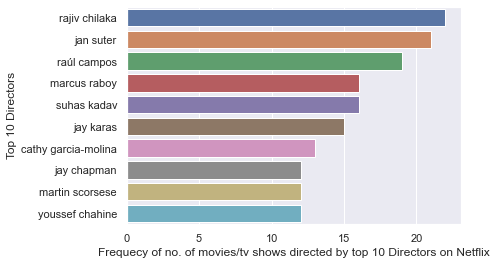

In [250]:
sns.set_theme(style="darkgrid")
sns.barplot(data = top10_dirlatest, y = 'Top 10 Directors', x='Frequency')
plt.xlabel('Frequecy of no. of movies/tv shows directed by top 10 Directors on Netflix')
plt.show()

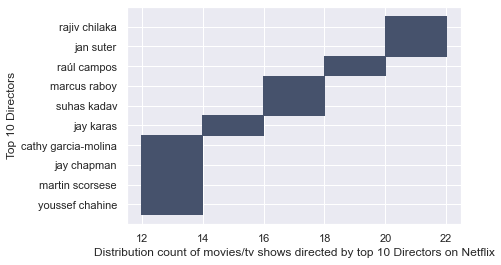

In [251]:
sns.set_theme(style="darkgrid")
sns.histplot(top10_dirlatest,y = 'Top 10 Directors', x='Frequency')
plt.xlabel('Distribution count of movies/tv shows directed by top 10 Directors on Netflix')
plt.show()

**Conclusions**:
- **nf_director_copy** is the updated copy of our original dataframe(nf) w.r.t unique Directors
- Above barplot and histplot shows the top 10 directors who have their movies on Netflix

# Cast specific EDA

In [252]:
nf_cast_copy = nf

In [253]:
cast_2d_list = nf['cast'].apply(lambda x:str(x).split(',')).to_list()

In [254]:
cast_list_fin = []
for i in range(len(cast_2d_list)):
    cast_list = []
    for j in range(len(cast_2d_list[i])):
        cast_list.append(cast_2d_list[i][j].strip().lower())
    cast_list_fin.append(cast_list)
# cast_list_fin  

In [255]:
nf_cast_df=pd.DataFrame(cast_list_fin,index=nf['title']) # as titles are unique for eachrow, keeping it as index as our primary key
nf_cast_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,ama qamata,khosi ngema,gail mabalane,thabang molaba,dillon windvogel,natasha thahane,arno greeff,xolile tshabalala,getmore sithole,cindy mahlangu,...,None,None,None,None,None,None,None,None,None,None


In [256]:
nf_cast_df1=nf_cast_df.stack()
nf_cast_df1

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               ama qamata
                      1              khosi ngema
                      2            gail mabalane
                      3           thabang molaba
                                   ...          
Zubaan                3         manish chaudhary
                      4             meghna malik
                      5            malkeet rauni
                      6           anita shabdish
                      7    chittaranjan tripathy
Length: 64951, dtype: object

In [257]:
nf_cast_df2=pd.DataFrame(nf_cast_df1)
nf_cast_df2

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             ama qamata
                     1            khosi ngema
                     2          gail mabalane
                     3         thabang molaba
...                                       ...
Zubaan               3       manish chaudhary
                     4           meghna malik
                     5          malkeet rauni
                     6         anita shabdish
                     7  chittaranjan tripathy

[64951 rows x 1 columns]

In [258]:
nf_cast_df2.reset_index(inplace = True)
nf_cast_df2

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,ama qamata
2,Blood & Water,1,khosi ngema
3,Blood & Water,2,gail mabalane
4,Blood & Water,3,thabang molaba
...,...,...,...
64946,Zubaan,3,manish chaudhary
64947,Zubaan,4,meghna malik
64948,Zubaan,5,malkeet rauni
64949,Zubaan,6,anita shabdish


In [259]:
nf_cast_df2 = nf_cast_df2[['title',0]]
nf_cast_df2

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,ama qamata
2,Blood & Water,khosi ngema
3,Blood & Water,gail mabalane
4,Blood & Water,thabang molaba
...,...,...
64946,Zubaan,manish chaudhary
64947,Zubaan,meghna malik
64948,Zubaan,malkeet rauni
64949,Zubaan,anita shabdish


In [260]:
nf_cast_df2.columns = ['title','cast_modified']
nf_cast_df2

,title,cast_modified
0,Dick Johnson Is Dead,nan
1,Blood & Water,ama qamata
2,Blood & Water,khosi ngema
3,Blood & Water,gail mabalane
4,Blood & Water,thabang molaba
...,...,...
64946,Zubaan,manish chaudhary
64947,Zubaan,meghna malik
64948,Zubaan,malkeet rauni
64949,Zubaan,anita shabdish


In [261]:
nf_cast_copy = nf_cast_copy.merge(nf_cast_df2, on='title',  how='inner')
nf_cast_copy.shape

(64951, 15)

In [266]:
nf_cast_copy.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month,cast_modified
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,nan
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,ama qamata
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,khosi ngema


In [276]:
nf_cast_copy_new = nf_cast_copy.dropna()
nf_cast_copy_new.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month,cast_modified
20,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9,sami bouajila
21,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9,tracy gotoas
22,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9,samuel jouy


In [282]:
nf_cast_top10 = nf_cast_copy['cast_modified'].value_counts().head(11)
nf_cast_top10 = nf_cast_top10[1:]
nf_cast_top10

anupam kher         43
shah rukh khan      35
julie tejwani       33
naseeruddin shah    32
takahiro sakurai    32
rupa bhimani        31
akshay kumar        30
om puri             30
yuki kaji           29
amitabh bachchan    28
Name: cast_modified, dtype: int64

In [280]:
# nf_cast_new_top10 = nf_cast_copy_new['cast_modified'].value_counts().head(10)
# nf_cast_new_top10

In [283]:
nf_cast_top10_dfnew = pd.DataFrame({'Frequency':nf_cast_top10})
top10_castnewest = nf_cast_top10_dfnew.reset_index()
top10_castlatest = top10_castnewest.rename(columns = {'index':'Top 10 Casts'})
top10_castlatest


,Top 10 Casts,Frequency
0,anupam kher,43
1,shah rukh khan,35
2,julie tejwani,33
3,naseeruddin shah,32
4,takahiro sakurai,32
5,rupa bhimani,31
6,akshay kumar,30
7,om puri,30
8,yuki kaji,29
9,amitabh bachchan,28


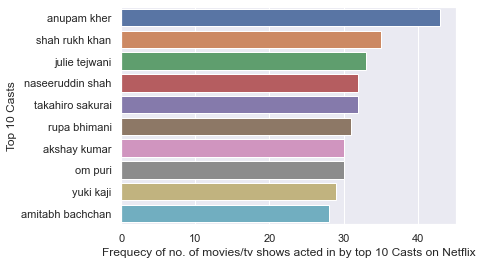

In [284]:
sns.set_theme(style="darkgrid")
sns.barplot(data = top10_castlatest, y = 'Top 10 Casts', x='Frequency')
plt.xlabel('Frequecy of no. of movies/tv shows acted in by top 10 Casts on Netflix')
plt.show()


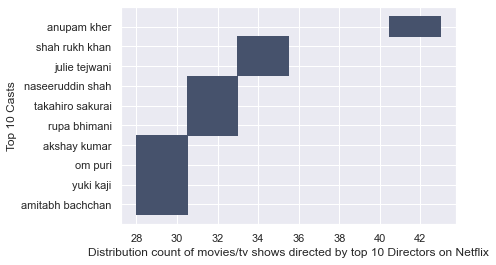

In [286]:
sns.set_theme(style="darkgrid")
sns.histplot(top10_castlatest,y = 'Top 10 Casts', x='Frequency')
plt.xlabel('Distribution count of movies/tv shows directed by top 10 Directors on Netflix')
plt.show()

**Conclusions**:
- **nf_cast_copy** is the updated copy of our original dataframe(nf) w.r.t unique Cast from movies/tv shows
- Above barplot and histplot shows the top 10 directors who have their movies on Netflix

# EDA w.r.t more focus on INDIA

In [288]:
nf_country_copy.head(2)
#country_modified

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month,country_modified
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,united states
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,south africa


In [289]:
nf_India = nf_country_copy[nf_country_copy['country_modified'] == 'india']
nf_India.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month,country_modified
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,9,india
30,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21,9,india


In [290]:
nf_India.shape

(1046, 15)

In [291]:
nf_India_tv = nf_country_copy.loc[(nf_country_copy['type'] == 'TV Show') & (nf_country_copy['country_modified'] == 'india')]
nf_India_tv.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month,country_modified
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,9,india
49,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021-09-16,9,india


In [292]:
nf_India_tv.shape

(84, 15)

In [323]:
nf_India_tv['rating'].value_counts()

TV-MA    34
TV-14    25
TV-PG    11
TV-Y      6
TV-Y7     5
TV-G      3
Name: rating, dtype: int64

**Conclusion**: 
- **country_modified** is the cleaned column for all unique countries from the modified and updated dataframe **nf_country_copy** after removing all the outliers and messy data.
- Total **84 tv shows** from India are there on Netflix

In [294]:
nf_India_movie = nf_country_copy.loc[(nf_country_copy['type'] == 'Movie') & (nf_country_copy['country_modified'] == 'india')]
nf_India_movie.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month,country_modified
30,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21,9,india
36,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021-09-19,9,india


In [295]:
nf_India_movie.shape

(962, 15)

**Conclusion**: 
- **country_modified** is the cleaned column for all unique countries from the modified and updated dataframe **nf_country_copy** after removing all the outliers and messy data.
- Total **962 movies** from India are there on Netflix.

# Top 10 directors -India

- **nf_India**: updated dataframe with cleaned data w.r.t countries from (nf_country_copy) dataframe
- **nf_director_copy** : updated dataframe with cleaned data w.r.t every director

- **nf_India_movie** : Movies from india dataframe
- **nf_India_tv**    : TV shows from india dataframe

In [297]:
nf_director_copy.shape

(9612, 15)

In [300]:
nf_director_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,month,director_modified
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,kirsten johnson
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,nan


In [298]:
nf_India_Dir = nf_India

In [299]:
nf_India_Dir = nf_India_Dir.merge(nf_director_copy, on='title',  how='inner')
nf_India_Dir.shape

(1130, 29)

In [305]:
top_10_dir_India = nf_India_Dir['director_modified'].value_counts().head(11)
top_10_dir_India = top_10_dir_India[1:]
top_10_dir_India

anurag kashyap        9
david dhawan          9
umesh mehra           8
priyadarshan          7
dibakar banerjee      7
ram gopal varma       7
anees bazmee          6
sooraj r. barjatya    6
imtiaz ali            6
karan johar           6
Name: director_modified, dtype: int64

In [303]:
nf_India_Dir['director_modified'].nunique()

736

In [306]:
top_10_dir_India_dfnew = pd.DataFrame({'Frequency':top_10_dir_India})
top10_dir_INDnewest = top_10_dir_India_dfnew.reset_index()
top10_dir_INDlatest = top10_dir_INDnewest.rename(columns = {'index':'Top 10 Indian Directors'})
top10_dir_INDlatest


,Top 10 Indian Directors,Frequency
0,anurag kashyap,9
1,david dhawan,9
2,umesh mehra,8
3,priyadarshan,7
4,dibakar banerjee,7
5,ram gopal varma,7
6,anees bazmee,6
7,sooraj r. barjatya,6
8,imtiaz ali,6
9,karan johar,6


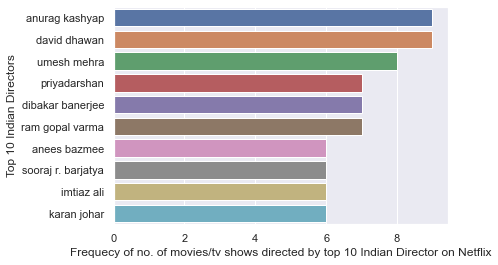

In [307]:
sns.set_theme(style="darkgrid")
sns.barplot(data = top10_dir_INDlatest, y = 'Top 10 Indian Directors', x='Frequency')
plt.xlabel('Frequecy of no. of movies/tv shows directed by top 10 Indian Director on Netflix')
plt.show()

In [324]:
nf_India_tv2 = nf_India_tv.sort_values(by = 'release_year',ascending=False,ignore_index=True)
nf_India_tv3 = nf_India_tv2.loc[:,['title','release_year','duration','country_modified','rating']]
nf_India_tv3[['Num']] = nf_India_tv3['duration'].str.split(" ",expand = True)[0]
nf_India_tv3['Num'] = nf_India_tv3['Num'].astype(int)
# nf_India_tv3
nf_India_tv4 = nf_India_tv3.sort_values(by = 'Num',ascending=False,ignore_index=True)
nf_India_tv4.head(10)

,title,release_year,duration,country_modified,rating,Num
0,Octonauts,2015,4 Seasons,india,TV-Y,4
1,Chhota Bheem,2021,3 Seasons,india,TV-Y7,3
2,The House That Made Me,2015,3 Seasons,india,TV-PG,3
3,Little Things,2019,3 Seasons,india,TV-MA,3
4,Pyaar Tune Kya Kiya,2014,3 Seasons,india,TV-14,3
5,Kota Factory,2021,2 Seasons,india,TV-MA,2
6,Sab Jholmaal Hai,2017,2 Seasons,india,TV-Y7,2
7,Regiment Diaries,2020,2 Seasons,india,TV-PG,2
8,The Big Day,2021,2 Seasons,india,TV-14,2
9,Sacred Games,2019,2 Seasons,india,TV-MA,2


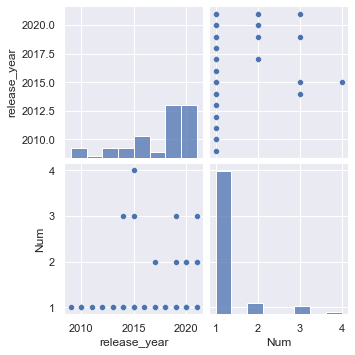

In [330]:
sns.pairplot(data = nf_India_tv4)
plt.show()

C:\Users\s.sunil.udgirkar\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


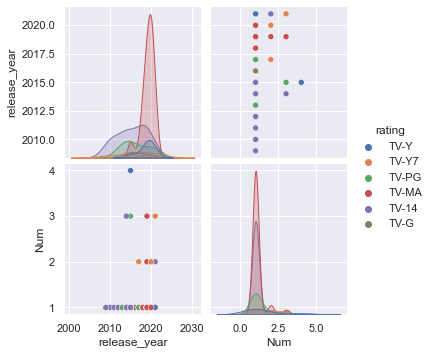

In [327]:
sns.pairplot(data = nf_India_tv4, hue = 'rating')
plt.show()

In [328]:
nf_India_movie2 = nf_India_movie.sort_values(by = 'release_year',ascending=False,ignore_index=True)
nf_India_movie3 = nf_India_movie2.loc[:,['title','release_year','duration','country_modified','rating']]
nf_India_movie3[['Num']] = nf_India_movie3['duration'].str.split(" ",expand = True)[0]
nf_India_movie3['Num'] = nf_India_movie3['Num'].astype(int)
nf_India_movie4 = nf_India_movie3.sort_values(by = 'Num',ascending=False,ignore_index=True)
nf_India_movie4.head(10)

,title,release_year,duration,country_modified,rating,Num
0,Sangam,1964,228 min,india,TV-14,228
1,Lagaan,2001,224 min,india,PG,224
2,Jodhaa Akbar,2008,214 min,india,TV-14,214
3,Kabhi Khushi Kabhie Gham,2001,209 min,india,TV-14,209
4,What's Your Raashee?,2009,203 min,india,TV-PG,203
5,Hum Aapke Hain Koun,1994,193 min,india,TV-14,193
6,Maine Pyar Kiya,1989,192 min,india,TV-PG,192
7,Kabhi Alvida Naa Kehna,2006,192 min,india,TV-14,192
8,Pardes,1997,187 min,india,TV-14,187
9,Kal Ho Naa Ho,2003,187 min,india,TV-14,187


In [331]:
nf_India_movie4['rating'].value_counts()

TV-14       547
TV-MA       232
TV-PG       133
TV-Y7        12
PG-13        11
PG            7
TV-G          7
NR            7
R             5
TV-Y7-FV      1
Name: rating, dtype: int64

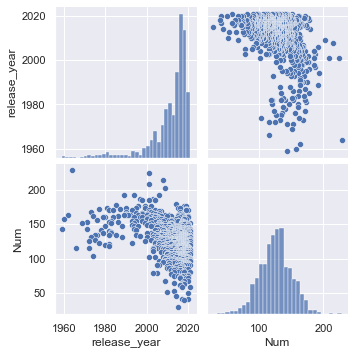

In [320]:
sns.pairplot(data = nf_India_movie4)
plt.show()

C:\Users\s.sunil.udgirkar\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\s.sunil.udgirkar\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


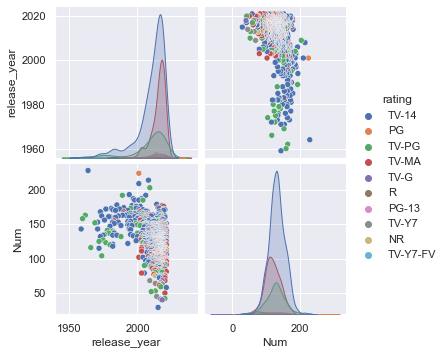

In [329]:
sns.pairplot(data = nf_India_movie4,hue = 'rating')
plt.show()

**Conclusion**:
- 1. Out of total 84 tv shows, the tv shows which are mostly enjoyed and hence has more seasons as compared to others are given in **nf_India_tv** dataframe. As it's eveident from the pairplot for TV shows, Netflix should focus mostly on TV-MA (34) and TV-14 (25) i.e TV shows for mature adults and under 14 years as they are mostly preferred by the audience

- 2. Out of total 962 Indian movies, most of the movies have duration in 100-150 mins. Netflix should focus on this range while producing more in this range as eveident from above pairplot. Movies with rating TV-14(547) i.e content for children above 14 are mostly preffered as opposed to the overall movie ratings throughout the world where TV-MA(232) is dominant. Netflix should focus more on this aspect with respect to Indian audience.

- 3. Dataframe **top10_dir_INDlatest** provides top 10 Indian directors. Netflix should reach out to them in order to direct more films.The bar plot is conclusive w.r.t this fact.